In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('InterpolatedWithCAPEX.csv')

In [3]:
df

,Dates,D REVENUE,U CR,D OE,D NOI,D FCF
0,2009-12-31,1884.372544,976.202014,475.249997,757.519678,1071.834493
1,2010-01-31,1884.566826,983.762225,485.004015,734.017979,1033.190422
2,2010-02-28,1884.761107,991.322435,494.758033,710.516281,994.546350
3,2010-03-31,1884.955389,998.882646,504.512051,687.014582,955.902279
4,2010-04-30,1880.767673,1006.377690,481.542613,511.922217,928.473553
...,...,...,...,...,...,...
119,2019-11-30,1146.881815,433.816967,436.290714,460.509240,733.164793
120,2019-12-31,1111.642375,415.370593,431.490513,417.984787,729.764211
121,2020-01-31,1142.095113,422.618925,430.139254,424.521959,737.713784
122,2020-02-29,1172.547851,429.867258,428.787994,431.059130,745.663358


In [4]:
dataset = df.values

In [5]:
dataset

array([['2009-12-31', 1884.372544, 976.2020142, 475.24999739999987,
        757.519678, 1071.834493],
       ['2010-01-31', 1884.5668256666668, 983.7622247333335, 485.0040154,
        734.0179793333333, 1033.1904216666667],
       ['2010-02-28', 1884.761107333333, 991.3224352666666,
        494.75803339999993, 710.5162806666667, 994.5463503333333],
       ['2010-03-31', 1884.955389, 998.8826458, 504.5120514, 687.014582,
        955.902279],
       ['2010-04-30', 1880.767673333333, 1006.3776901999997,
        481.5426128333333, 511.92221730000006, 928.4735526333333],
       ['2010-05-31', 1876.5799576666668, 1013.8727346000001,
        458.5731742666666, 336.8298526000001, 901.0448262666665],
       ['2010-06-30', 1872.392242, 1021.367779, 435.6037357, 161.7374879,
        873.6160999],
       ['2010-07-31', 1853.240114, 1015.1698886666666, 421.8261523,
        187.6358415, 863.0179451333332],
       ['2010-08-31', 1834.087986, 1008.9719983333333, 408.0485689,
        213.5341951, 852.4

In [6]:
X = dataset[:,1:5]
Y = dataset[:,5]

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [8]:
X_scale

array([[0.38276953, 0.48490881, 0.28760773, 1.        ],
       [0.38286577, 0.49144556, 0.32225043, 0.9605532 ],
       [0.38296201, 0.4979823 , 0.35689312, 0.92110641],
       [0.38305824, 0.50451905, 0.39153581, 0.88165961],
       [0.38098387, 0.51099945, 0.30995679, 0.58777307],
       [0.3789095 , 0.51747985, 0.22837778, 0.29388654],
       [0.37683513, 0.52396025, 0.14679876, 0.        ],
       [0.36734818, 0.5186014 , 0.09786584, 0.0434695 ],
       [0.35786123, 0.51324255, 0.04893292, 0.086939  ],
       [0.34837428, 0.5078837 , 0.        , 0.1304085 ],
       [0.36639744, 0.51287461, 0.05993416, 0.14266337],
       [0.3844206 , 0.51786552, 0.11986831, 0.15491825],
       [0.40244375, 0.52285643, 0.17980247, 0.16717312],
       [0.36110259, 0.50921367, 0.15952074, 0.15377192],
       [0.31976144, 0.49557092, 0.13923902, 0.14037072],
       [0.27842028, 0.48192816, 0.1189573 , 0.12696952],
       [0.29020478, 0.45689534, 0.12775618, 0.12639516],
       [0.30198928, 0.43186251,

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(99, 4) (12, 4) (13, 4) (99,) (12,) (13,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model = Sequential([
    Dense(6, activation='softplus', input_shape=(4,)),
    Dense(32, activation='tanh'),
    Dense(12, activation='tanh'),
    Dense(6, activation='relu'),
    Dense(6, activation='exponential'),
    Dense(1, activation='sigmoid'),
])

In [13]:
model.compile(optimizer='Adam',
              loss='mean_absolute_error')

In [14]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=500,
          validation_data=(X_val, Y_val))

Train on 99 samples, validate on 12 samples
Epoch 1/500
99/99 [==============================] - 0s 3ms/step - loss: 750.2112 - val_loss: 716.7194
Epoch 2/500
99/99 [==============================] - 0s 40us/step - loss: 750.2026 - val_loss: 716.7123
Epoch 3/500
99/99 [==============================] - 0s 51us/step - loss: 750.1954 - val_loss: 716.7049
Epoch 4/500
99/99 [==============================] - 0s 61us/step - loss: 750.1878 - val_loss: 716.6974
Epoch 5/500
99/99 [==============================] - 0s 61us/step - loss: 750.1801 - val_loss: 716.6895
Epoch 6/500
99/99 [==============================] - 0s 50us/step - loss: 750.1721 - val_loss: 716.6815
Epoch 7/500
99/99 [==============================] - 0s 61us/step - loss: 750.1640 - val_loss: 716.6735
Epoch 8/500
99/99 [==============================] - 0s 51us/step - loss: 750.1560 - val_loss: 716.6658
Epoch 9/500
99/99 [==============================] - 0s 50us/step - loss: 750.1484 - val_loss: 716.6584
Epoch 10/500
99/99 [=

Epoch 79/500
99/99 [==============================] - 0s 51us/step - loss: 750.0162 - val_loss: 716.5334
Epoch 80/500
99/99 [==============================] - 0s 40us/step - loss: 750.0161 - val_loss: 716.5332
Epoch 81/500
99/99 [==============================] - 0s 40us/step - loss: 750.0161 - val_loss: 716.5332
Epoch 82/500
99/99 [==============================] - 0s 50us/step - loss: 750.0159 - val_loss: 716.5331
Epoch 83/500
99/99 [==============================] - 0s 40us/step - loss: 750.0159 - val_loss: 716.5330
Epoch 84/500
99/99 [==============================] - 0s 51us/step - loss: 750.0158 - val_loss: 716.5330
Epoch 85/500
99/99 [==============================] - 0s 40us/step - loss: 750.0158 - val_loss: 716.5329
Epoch 86/500
99/99 [==============================] - 0s 51us/step - loss: 750.0157 - val_loss: 716.5329
Epoch 87/500
99/99 [==============================] - 0s 40us/step - loss: 750.0156 - val_loss: 716.5329
Epoch 88/500
99/99 [==============================] - 0

Epoch 157/500
99/99 [==============================] - 0s 51us/step - loss: 750.0145 - val_loss: 716.5317
Epoch 158/500
99/99 [==============================] - 0s 40us/step - loss: 750.0145 - val_loss: 716.5317
Epoch 159/500
99/99 [==============================] - 0s 41us/step - loss: 750.0146 - val_loss: 716.5317
Epoch 160/500
99/99 [==============================] - 0s 40us/step - loss: 750.0145 - val_loss: 716.5317
Epoch 161/500
99/99 [==============================] - 0s 51us/step - loss: 750.0146 - val_loss: 716.5317
Epoch 162/500
99/99 [==============================] - 0s 61us/step - loss: 750.0145 - val_loss: 716.5317
Epoch 163/500
99/99 [==============================] - 0s 50us/step - loss: 750.0145 - val_loss: 716.5317
Epoch 164/500
99/99 [==============================] - 0s 51us/step - loss: 750.0145 - val_loss: 716.5317
Epoch 165/500
99/99 [==============================] - 0s 51us/step - loss: 750.0145 - val_loss: 716.5317
Epoch 166/500
99/99 [=========================

Epoch 235/500
99/99 [==============================] - 0s 30us/step - loss: 750.0143 - val_loss: 716.5315
Epoch 236/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5315
Epoch 237/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5315
Epoch 238/500
99/99 [==============================] - 0s 40us/step - loss: 750.0145 - val_loss: 716.5315
Epoch 239/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5315
Epoch 240/500
99/99 [==============================] - 0s 30us/step - loss: 750.0145 - val_loss: 716.5315
Epoch 241/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5315
Epoch 242/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5315
Epoch 243/500
99/99 [==============================] - 0s 51us/step - loss: 750.0143 - val_loss: 716.5315
Epoch 244/500
99/99 [=========================

Epoch 313/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 314/500
99/99 [==============================] - 0s 61us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 315/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 316/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 317/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 318/500
99/99 [==============================] - 0s 30us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 319/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 320/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 321/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 322/500
99/99 [=========================

Epoch 391/500
99/99 [==============================] - 0s 30us/step - loss: 750.0142 - val_loss: 716.5314
Epoch 392/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 393/500
99/99 [==============================] - 0s 30us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 394/500
99/99 [==============================] - 0s 40us/step - loss: 750.0142 - val_loss: 716.5314
Epoch 395/500
99/99 [==============================] - 0s 40us/step - loss: 750.0142 - val_loss: 716.5314
Epoch 396/500
99/99 [==============================] - 0s 51us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 397/500
99/99 [==============================] - 0s 51us/step - loss: 750.0142 - val_loss: 716.5314
Epoch 398/500
99/99 [==============================] - 0s 40us/step - loss: 750.0142 - val_loss: 716.5314
Epoch 399/500
99/99 [==============================] - 0s 40us/step - loss: 750.0142 - val_loss: 716.5314
Epoch 400/500
99/99 [=========================

Epoch 469/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 470/500
99/99 [==============================] - 0s 40us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 471/500
99/99 [==============================] - 0s 30us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 472/500
99/99 [==============================] - 0s 40us/step - loss: 750.0141 - val_loss: 716.5314
Epoch 473/500
99/99 [==============================] - 0s 40us/step - loss: 750.0142 - val_loss: 716.5314
Epoch 474/500
99/99 [==============================] - 0s 30us/step - loss: 750.0143 - val_loss: 716.5314
Epoch 475/500
99/99 [==============================] - 0s 30us/step - loss: 750.0142 - val_loss: 716.5314
Epoch 476/500
99/99 [==============================] - 0s 40us/step - loss: 750.0142 - val_loss: 716.5314
Epoch 477/500
99/99 [==============================] - 0s 30us/step - loss: 750.0142 - val_loss: 716.5314
Epoch 478/500
99/99 [=========================

In [15]:
import matplotlib.pyplot as plt

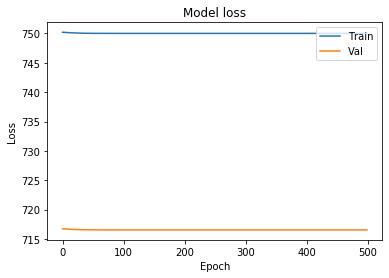

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()